# **Amazon Sales Data Prediction**

## Data Understanding

In [17]:
import piplite
await piplite.install(['seaborn'])


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Load dataset
amazon_data = pd.read_csv("amazon_sales.csv")

In [21]:
amazon_data.head(5)

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72


In [22]:
amazon_data.columns

Index(['order_id', 'order_date', 'product_id', 'product_category', 'price',
       'discount_percent', 'quantity_sold', 'customer_region',
       'payment_method', 'rating', 'review_count', 'discounted_price',
       'total_revenue'],
      dtype='object')

In [23]:
amazon_data.shape

(50000, 13)

In [24]:
amazon_data.isnull().sum()

order_id            0
order_date          0
product_id          0
product_category    0
price               0
discount_percent    0
quantity_sold       0
customer_region     0
payment_method      0
rating              0
review_count        0
discounted_price    0
total_revenue       0
dtype: int64

In [25]:
print(amazon_data.dtypes)

order_id              int64
order_date           object
product_id            int64
product_category     object
price               float64
discount_percent      int64
quantity_sold         int64
customer_region      object
payment_method       object
rating              float64
review_count          int64
discounted_price    float64
total_revenue       float64
dtype: object


In [26]:
# Check Non null values
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  int64  
 1   order_date        50000 non-null  object 
 2   product_id        50000 non-null  int64  
 3   product_category  50000 non-null  object 
 4   price             50000 non-null  float64
 5   discount_percent  50000 non-null  int64  
 6   quantity_sold     50000 non-null  int64  
 7   customer_region   50000 non-null  object 
 8   payment_method    50000 non-null  object 
 9   rating            50000 non-null  float64
 10  review_count      50000 non-null  int64  
 11  discounted_price  50000 non-null  float64
 12  total_revenue     50000 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 4.2+ MB


In [33]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          50000 non-null  int64         
 1   order_date        50000 non-null  datetime64[ns]
 2   product_id        50000 non-null  int64         
 3   product_category  50000 non-null  object        
 4   price             50000 non-null  float64       
 5   discount_percent  50000 non-null  int64         
 6   quantity_sold     50000 non-null  int64         
 7   customer_region   50000 non-null  object        
 8   payment_method    50000 non-null  object        
 9   rating            50000 non-null  float64       
 10  review_count      50000 non-null  int64         
 11  discounted_price  50000 non-null  float64       
 12  total_revenue     50000 non-null  float64       
 13  Year              50000 non-null  int32         
 14  Month             5000

## Data Cleaning

In [27]:
# Date Convert date datatype and split Month,Year,Quarter
amazon_data["order_date"] = pd.to_datetime(amazon_data["order_date"],format="%Y-%m-%d")
# Create new column Year
amazon_data["Year"] = amazon_data["order_date"].dt.year
amazon_data["Month"] = amazon_data["order_date"].dt.month
amazon_data["Month_Name"]= amazon_data["order_date"].dt.month_name()
amazon_data["Quarter"]=amazon_data["order_date"].dt.quarter

In [28]:
amazon_data.head(3)

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue,Year,Month,Month_Name,Quarter
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52,2022,4,April,2
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40,2023,3,March,1
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28,2022,9,September,3


In [29]:
# Statistics
amazon_data.describe()

,order_id,order_date,product_id,price,discount_percent,quantity_sold,rating,review_count,discounted_price,total_revenue,Year,Month,Quarter
count,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0000,50000.000000
mean,25000.500000,2022-12-31 10:47:16.800000256,2986.848740,252.507260,13.340700,2.999400,2.996316,249.329280,218.886566,657.331475,2022.501480,6.5044,2.503160
min,1.000000,2022-01-01 00:00:00,1000.000000,5.010000,0.000000,1.000000,1.000000,0.000000,3.530000,3.840000,2022.000000,1.0000,1.000000
25%,12500.750000,2022-07-02 00:00:00,1983.000000,127.840000,5.000000,2.000000,2.000000,125.000000,109.680000,240.320000,2022.000000,4.0000,2.000000
50%,25000.500000,2023-01-02 00:00:00,2983.000000,252.970000,10.000000,3.000000,3.000000,250.000000,215.805000,505.410000,2023.000000,7.0000,3.000000
75%,37500.250000,2023-07-02 00:00:00,3989.000000,376.335000,20.000000,4.000000,4.000000,374.000000,322.702500,968.970000,2023.000000,9.0000,3.000000
max,50000.000000,2023-12-31 00:00:00,4999.000000,499.990000,30.000000,5.000000,5.000000,499.000000,499.910000,2499.550000,2023.000000,12.0000,4.000000
std,14433.901067,NaN,1156.374535,143.025544,9.850694,1.415401,1.154295,144.251981,127.317681,526.223968,0.500003,3.4360,1.112985


## Time Series Analysis

   Year  total_revenue
0  2022    16389404.56
1  2023    16477169.18


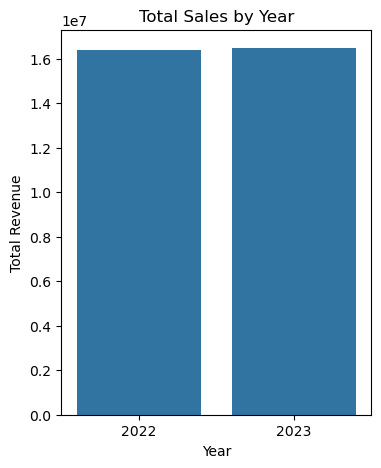

In [30]:
# Total Sales by year
sales_by_year = amazon_data.groupby("Year")["total_revenue"].sum().reset_index()
print(sales_by_year)

# Visualization
plt.figure(figsize=(4,5))
sns.barplot(x="Year",y="total_revenue",data=sales_by_year)
plt.title("Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.show()

   Month_Name  total_revenue
0       April     2678973.77
1      August     2845629.94
2    December     2721394.94
3    February     2505094.80
4     January     2883926.88
5        July     2788265.84
6        June     2746947.62
7       March     2759003.83
8         May     2806178.34
9    November     2625428.52
10    October     2760754.34
11  September     2744974.92


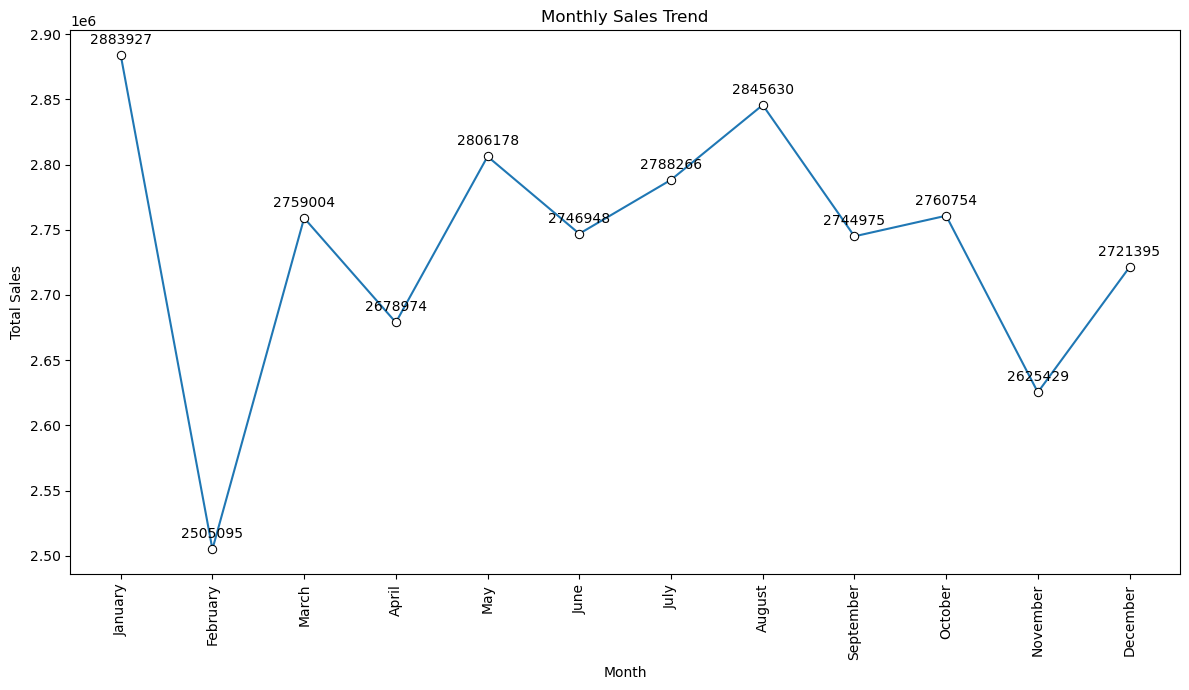

In [66]:
# Total Sales by Month
monthly_sales = amazon_data.groupby('Month_Name')['total_revenue'].sum().reset_index()
print(monthly_sales)

# Define correct month order
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

# Convert Month_Name to categorical with proper order
monthly_sales['Month_Name'] = pd.Categorical(
    monthly_sales['Month_Name'],
    categories=month_order,
    ordered=True
)

# Sort by calendar order
monthly_sales = monthly_sales.sort_values('Month_Name').reset_index(drop=True)

# Visualization
plt.figure(figsize=(12,7))
month_plot = sns.lineplot(
    data=monthly_sales,
    x='Month_Name',
    y='total_revenue',
    marker='o'
)

# Change only marker color
for line in month_plot.lines:
    line.set_markerfacecolor("white")   # inside color
    line.set_markeredgecolor("black")   # border

# Add value labels near markers
for i, row in monthly_sales.iterrows():
    month_plot.annotate(
        f'{row["total_revenue"]:.0f}',
        (i, row['total_revenue']),   # use numeric x positions
        textcoords="offset points",
        xytext=(0,8),
        ha='center'
    )

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


   Quarter  total_revenue
0        1     8148025.51
1        2     8232099.73
2        3     8378870.70
3        4     8107577.80


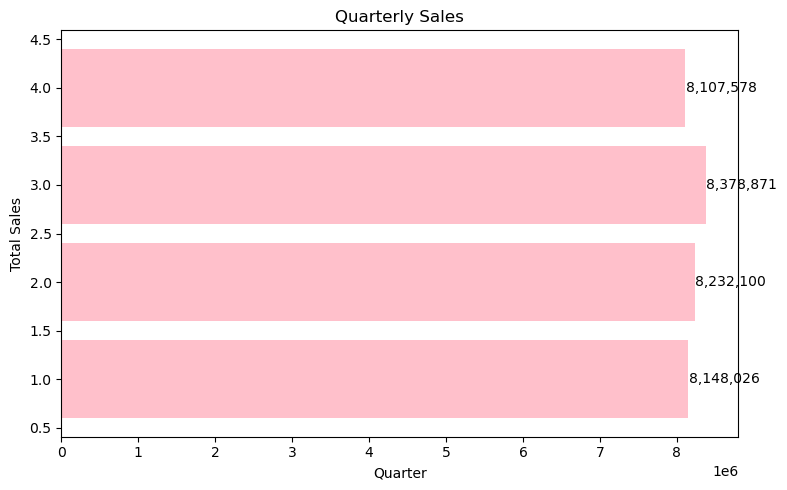

In [68]:
# Quarterly Sales
quarter_sales = amazon_data.groupby('Quarter')['total_revenue'].sum().reset_index()
print(quarter_sales)

# Visualization
plt.figure(figsize=(8,5))
quarter_plot = plt.barh(quarter_sales["Quarter"],quarter_sales["total_revenue"],color="pink")

for bar in quarter_plot:
    width = bar.get_width()        # width of the bar = total_revenue
    y = bar.get_y() + bar.get_height()/2  # vertical center of the bar
    plt.text(width + 5000, y,      # small offset to the right
             f'{width:,.0f}',      # formatted value
             va='center') 
    
plt.title("Quarterly Sales")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


## Exploratory Data Analysis

### *Total Sales by Product*

  product_category  total_revenue
0           Beauty     5550624.97
1            Books     5484863.03
2      Electronics     5470594.03
3          Fashion     5480123.34
4   Home & Kitchen     5473132.55
5           Sports     5407235.82


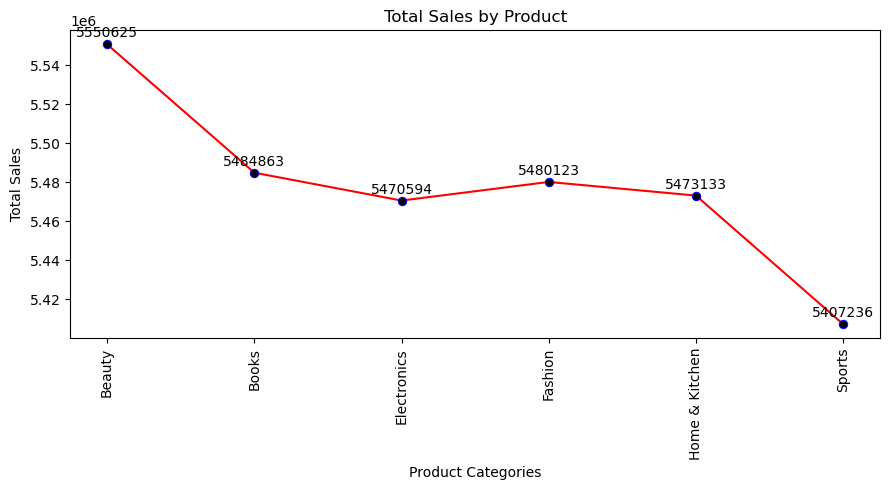

In [76]:
# Total Sales by Product
product_sales = (amazon_data.groupby("product_category", as_index=False)["total_revenue"].sum())
print(product_sales)

# sort for better visualization
product_sales = product_sales.sort_values("product_category")

# Visualization
plt.figure(figsize=(9,5))

ax = sns.lineplot(
    data=product_sales,
    x="product_category",
    y="total_revenue",
    color="red",
    marker="o"
)
# Change only marker color
for line in ax.lines:
    line.set_markerfacecolor("black")   # inside color
    line.set_markeredgecolor("blue")
    
# Add value labels on each marker
for i, row in product_sales.iterrows():  
    ax.annotate(
        f'{row["total_revenue"]:.0f}',
        (i, row["total_revenue"]),
        textcoords="offset points",
        xytext=(0,5),
        ha='center'
    )

plt.title("Total Sales by Product")
plt.xlabel("Product Categories")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### *Total Sales by Region*

  customer_region  total_revenue
0            Asia     8175199.83
1          Europe     8112311.57
2     Middle East     8301844.50
3   North America     8277217.84


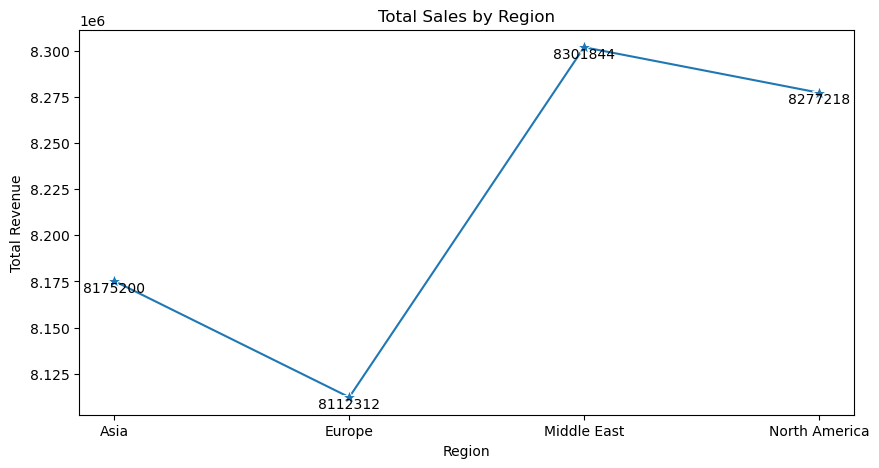

In [39]:
# Total Sales by Region
region_sales = amazon_data.groupby("customer_region")["total_revenue"].sum().reset_index()
print(region_sales)

# visualization
plt.figure(figsize=(10,5))
plots =sns.lineplot(x="customer_region", y="total_revenue", data=region_sales, marker="*", markersize=10)

for i, row in region_sales.iterrows():
    plots.text(
        x=i,  # position on x-axis
        y=row["total_revenue"],
        s=f'{row["total_revenue"]:.0f}',  # value format
        ha='center',
        va='top'
    )
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.show()

### *Payment Method impact on Total sales*

     payment_method  total_revenue
0  Cash on Delivery     6546386.94
1       Credit Card     6540087.16
2        Debit Card     6522019.73
3               UPI     6579441.44
4            Wallet     6678638.47


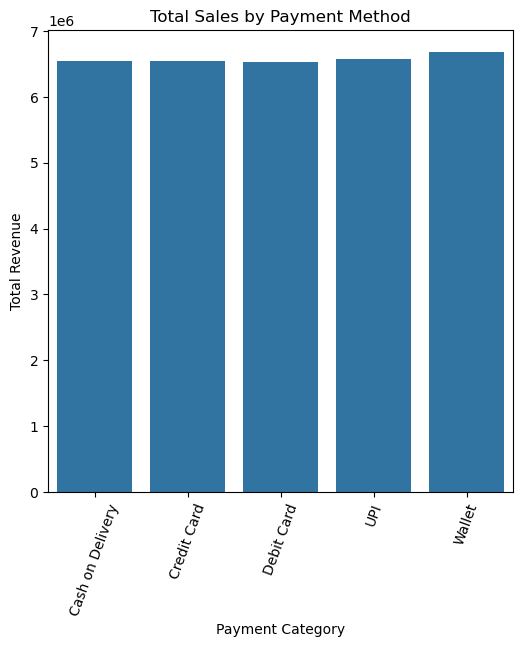

In [41]:
# Payment Method impact on Total sales
payment_method = amazon_data.groupby("payment_method")["total_revenue"].sum().reset_index()
print(payment_method)

# visualization
plt.figure(figsize=(6,6))
sns.barplot(x="payment_method", y="total_revenue", data=payment_method)
plt.title("Total Sales by Payment Method")
plt.xlabel("Payment Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=70)
plt.show()

### *Product Quantity Sold impacts on Total Sales*

  product_category  quantity_sold
0           Beauty          25422
1            Books          25065
2      Electronics          24898
3          Fashion          25089
4   Home & Kitchen          24743
5           Sports          24753


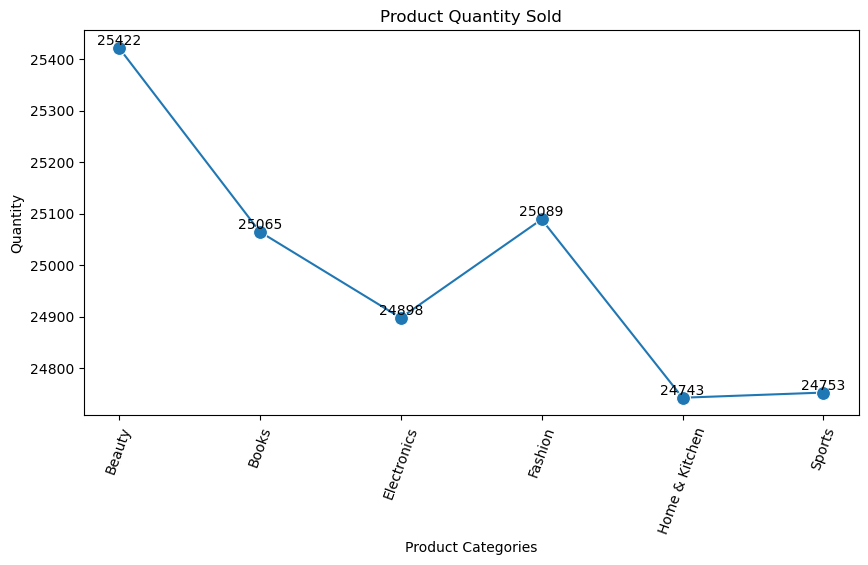

In [69]:
# Product Quantity Sold impacts on Total Sales
qty_sold = amazon_data.groupby("product_category")["quantity_sold"].sum().reset_index()
print(qty_sold)

# visualization
plt.figure(figsize=(10,5))
qplot= sns.lineplot(x="product_category", y="quantity_sold", data=qty_sold, marker="o", markersize=10)
for i, row in qty_sold.iterrows():
    qplot.text(
        x=i,  # position on x-axis
        y=row["quantity_sold"],
        s=f'{row["quantity_sold"]:.0f}',  # value format
        ha='center',
        va='bottom'
    )
plt.title("Product Quantity Sold")
plt.xlabel("Product Categories")
plt.ylabel("Quantity")
plt.xticks(rotation=70)
plt.show()

### *Rating impact on Sales*

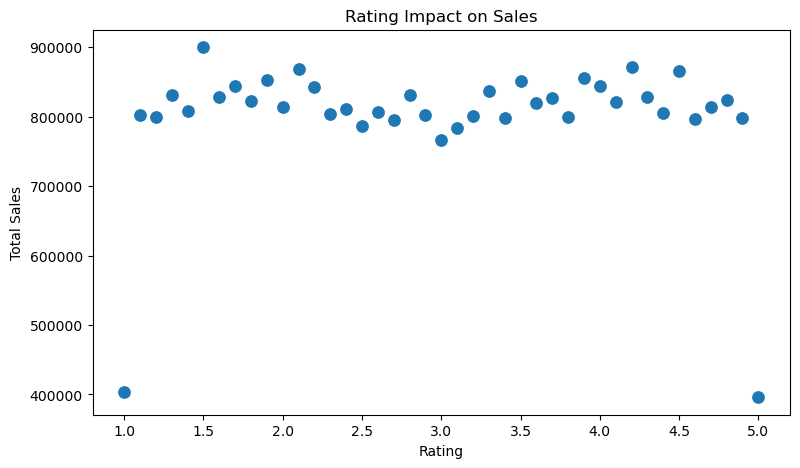

In [43]:
# Rating impact on Sales
rating_sales = (amazon_data.groupby("rating")["total_revenue"].sum().reset_index().sort_values("rating"))

# Visualization
plt.figure(figsize=(9,5))
sns.scatterplot(x="rating", y="total_revenue", data=rating_sales, s=100 ) # marker size)
plt.title("Rating Impact on Sales")
plt.xlabel("Rating")
plt.ylabel("Total Sales")
plt.show()


### *Discount percentage impact on sales*

   discount_percent  total_revenue
0                 0     6154055.31
1                 5     6182826.90
2                10     5732411.47
3                15     5322103.91
4                20     5128525.23
5                30     4346650.92


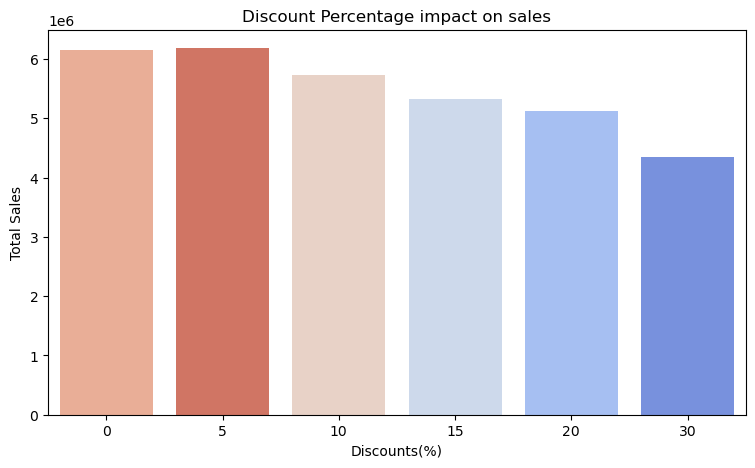

In [70]:
# Discount percentage impact on sales
discount_percent_sales = amazon_data.groupby("discount_percent")["total_revenue"].sum().reset_index()
print(discount_percent_sales)

# Visualization
plt.figure(figsize=(9,5))
colors = sns.color_palette("coolwarm", n_colors=len(discount_percent_sales))
sns.barplot(x="discount_percent", y="total_revenue", data=discount_percent_sales, hue='total_revenue',palette=colors,legend=False)
plt.title("Discount Percentage impact on sales")
plt.xlabel("Discounts(%)")
plt.ylabel("Total Sales")
plt.show()

## Correlation Analysis

                     price  discount_percent  quantity_sold    rating  \
price             1.000000         -0.004654       0.004405  0.006386   
discount_percent -0.004654          1.000000       0.001399  0.003715   
quantity_sold     0.004405          0.001399       1.000000 -0.002879   
rating            0.006386          0.003715      -0.002879  1.000000   
review_count      0.001282          0.005193       0.000717 -0.002895   
total_revenue     0.711094         -0.144392       0.594404  0.001804   

                  review_count  total_revenue  
price                 0.001282       0.711094  
discount_percent      0.005193      -0.144392  
quantity_sold         0.000717       0.594404  
rating               -0.002895       0.001804  
review_count          1.000000       0.002208  
total_revenue         0.002208       1.000000  


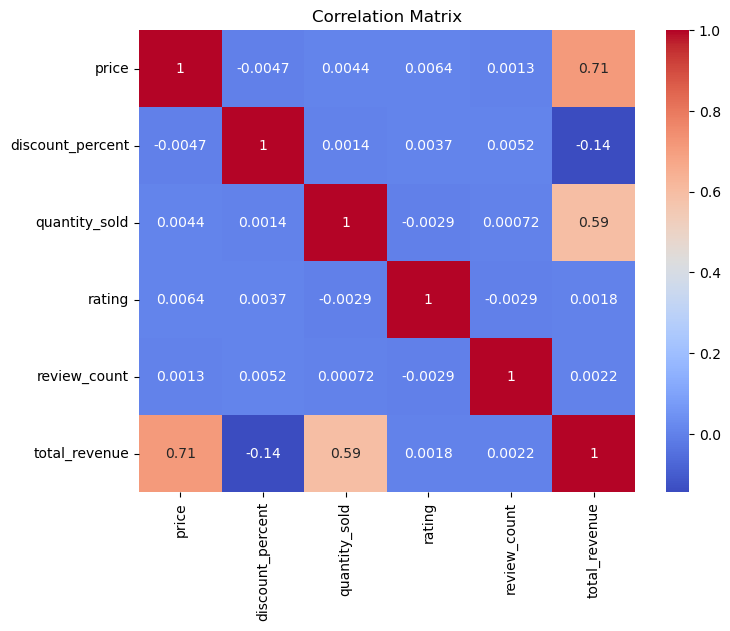

In [72]:
# Select numeric columns
numeric_cols = ['price','discount_percent','quantity_sold','rating','review_count','total_revenue']

# Compute correlation matrix
corr_matrix = amazon_data[numeric_cols].corr()
print(corr_matrix)

# Visualize with heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


### **Observation**
>Total revenue is primarily driven by product price and quantity sold, while discount percentage has a small negative effect. Features like rating and review count do not have a meaningful direct impact on revenue.

## Machine Learning

### Prepare Data

In [52]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [58]:
# Copy original data
data = amazon_data.copy()

In [59]:
# Encode Categorical Columns
le_pc = LabelEncoder()
le_cr = LabelEncoder()
le_pm = LabelEncoder()
data["product_category"]=le_pc.fit_transform(data["product_category"])
data["customer_region"] = le_cr.fit_transform(data["customer_region"])
data["payment_method"] =le_pm.fit_transform(data["payment_method"])


# Find target features
X = data[['product_category', 'price',
       'discount_percent', 'quantity_sold', 'customer_region',
       'payment_method', 'rating', 'review_count']]
y =data["total_revenue"]

# Split train and test data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)


### Model 1: Linear Regression

In [60]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

# Evaluate
print("R2 score is:", r2_score(y_test, y_predict))
print("Mean Square Error value is:", mean_squared_error(y_test,y_predict))

R2 score is: 0.8722483889867896
Mean Square Error value is: 34692.96181121439


### Observation

* **R²** ~ 0.87 → still captures ~87% of variance in revenue.
* **RMSE** ~ 34k → shows residual errors are quite high.
>The model is interpretable but not extremely precise.Good for understanding relationships (quantity sold, price, discount, rating impact).

In [62]:
# Linear Regression Coefficients
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coeff_df)


            Feature  Coefficient
3     quantity_sold   220.695804
1             price     2.614062
4   customer_region     0.931459
5    payment_method     0.640380
0  product_category     0.234521
7      review_count     0.005701
6            rating    -0.367882
2  discount_percent    -7.645005


### Observation
**Linear Regression gives clear interpretability** : 
>quantity_sold is the most important driver, discount reduces revenue slightly, price has moderate effect, other features are minor.So focus on increasing units sold rather than over-discounting.

### Model 2: RandomForest Regression

In [63]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,   # number of trees
    max_depth=10,       # maximum depth of each tree
    random_state=42
)
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


R2 Score: 0.9998658671962779
RMSE: 6.035385255535142


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Evaluate training performance
y_train_pred = rf.predict(X_train)
print("Train R2:", r2_score(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))


Train R2: 0.9998951413059098
Train RMSE: 5.4106877003157905


### **Observations**
* **R²** ~ 0.99986 → almost perfect prediction.
* **RMSE** ~ 6 → extremely low error compared to the scale of total_revenue.


## Feature Importance

            Feature    importance
1             price  5.229159e-01
3     quantity_sold  4.463781e-01
2  discount_percent  3.070601e-02
7      review_count  8.839612e-09
6            rating  7.899607e-09
0  product_category  7.555118e-09
4   customer_region  2.092430e-09
5    payment_method  1.666474e-09


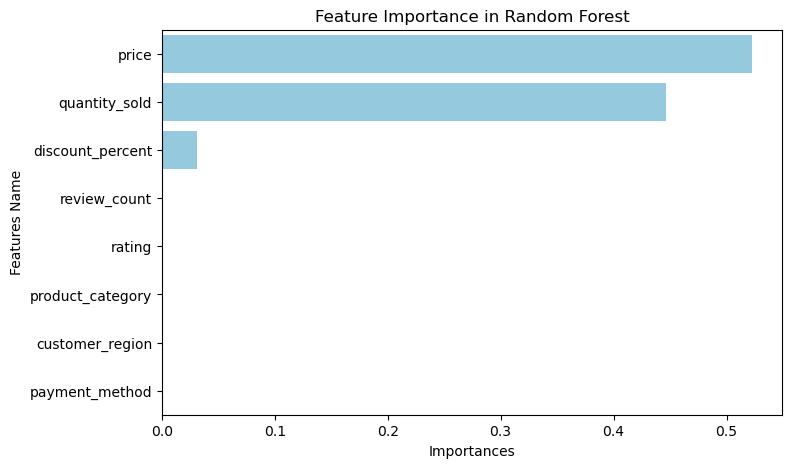

In [65]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance',ascending=False)
print(importance)

plt.figure(figsize=(8,5))
sns.barplot(x="importance",y="Feature", data=importance, color='skyblue')
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importances")
plt.ylabel("Features Name")
plt.show()

### Observation
> Price (0.52)-most important, Quantity Sold (0.45) -second most important.Other features like rating, review_count, category, region are almost negligible.Revenue mostly depends on price × quantity_sold.

## **Conclusion**

* Revenue Drivers: Price and quantity sold dominate, other features have minor impact.
* Sales Strategy Insights: Focus on top-performing products, use discounts carefully, optimize payment methods.
* Modeling Insights: Linear Regression is interpretable; Random Forest gives highly accurate predictions.
* Seasonality: Peak months (January, Q3) should be targeted for marketing campaigns.
Key Recommendation: Combine demand forecasting (Random Forest) with feature impact analysis (Linear Regression) to guide inventory, pricing, and promotions for maximizing Amazon revenue